In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#importing data and exploring it
housing = pd.read_csv('D:/DATA SCIENCE/california/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
#checking for duplicates and null values 
print(f"Duplicate Rows: {housing.duplicated().sum()}")
missing_values = housing.isnull().sum()
print(missing_values)

Duplicate Rows: 0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [16]:
#dropping null values
housing_cleaned = housing.dropna()
housing_cleaned.shape

(20433, 10)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

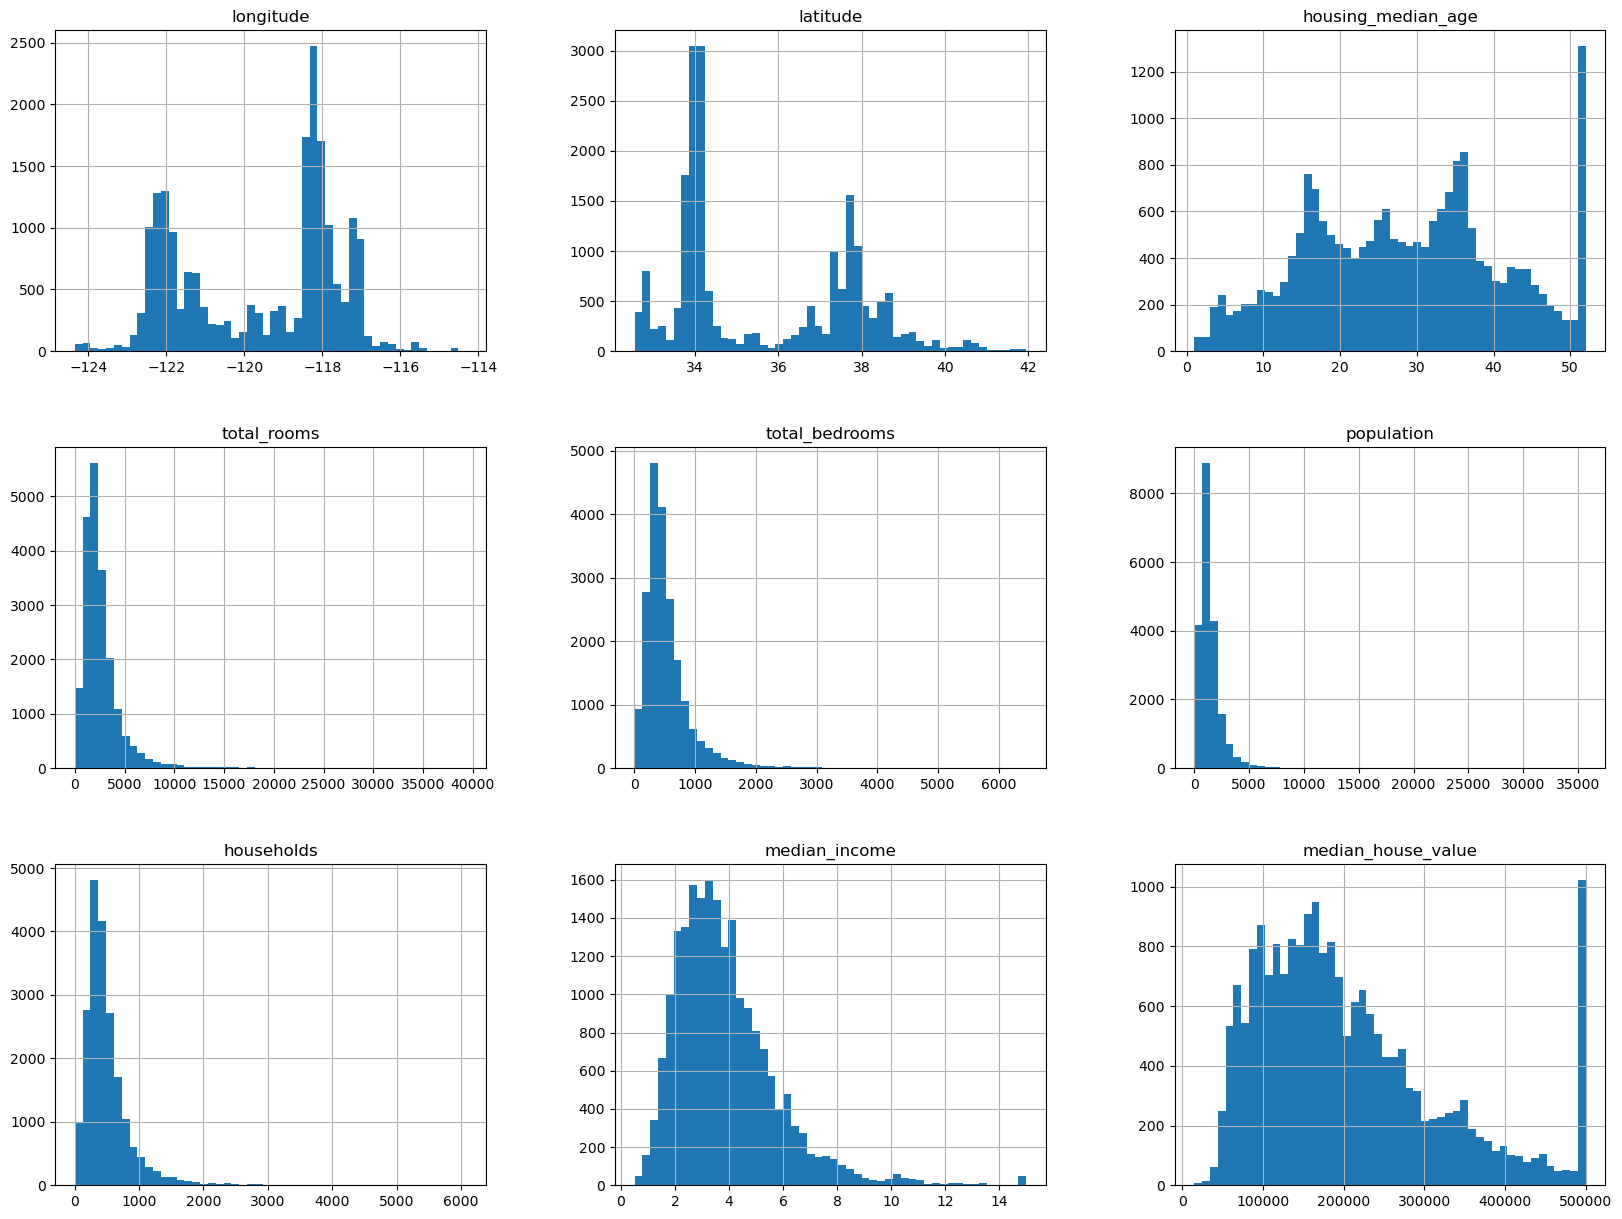

In [17]:
#understanding the data and checking for outliers
housing_cleaned.hist(bins=50,figsize=(20,15))

In [18]:
housing_cleaned["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [19]:
#dropping the island 
housing_filtered = housing_cleaned[housing_cleaned["ocean_proximity"] != "ISLAND"]

housing_filtered["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: count, dtype: int64

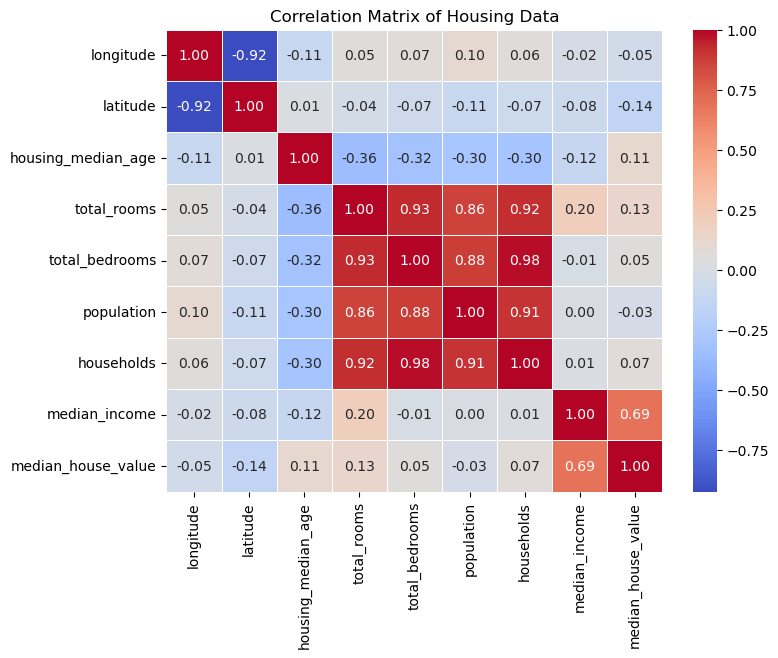

In [82]:
#correlation analysis
housing_filtered.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Housing Data")
plt.show()

In [80]:
#median_house_value analysis

correlation_matrix=housing_filtered.corr(numeric_only=True)
correlation_matrix["median_house_value"].sort_values(ascending = False)


median_house_value    1.000000
median_income         0.688848
total_rooms           0.133516
housing_median_age    0.106077
households            0.065122
total_bedrooms        0.049792
population           -0.025069
longitude            -0.045642
latitude             -0.144312
Name: median_house_value, dtype: float64

In [ ]:
#house prices by ocean proximity 
ocean_price = housing_filtered.groupby("ocean_proximity")["median_house_value"].sum().sort_values()

plt.figure(figsize=(6, 4))
sns.barplot(x=ocean_price.index, y=ocean_price.values, hue=ocean_price.index, palette="coolwarm", legend=False)
plt.xlabel("Ocean Proximity")
plt.ylabel("Average House Value ($)")
plt.title("Average House Value by Ocean Proximity")
plt.xticks(rotation=45)
plt.show()

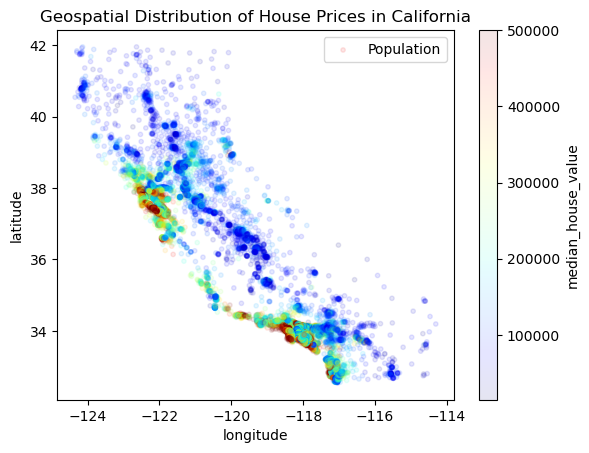

In [26]:
#Geospatial Distribution of House Prices

housing_filtered.plot(kind="scatter", x="longitude", y="latitude", s=10, alpha=0.1, label="Population",c="median_house_value",cmap=plt.get_cmap("jet"))
plt.title("Geospatial Distribution of House Prices in California")
plt.show()

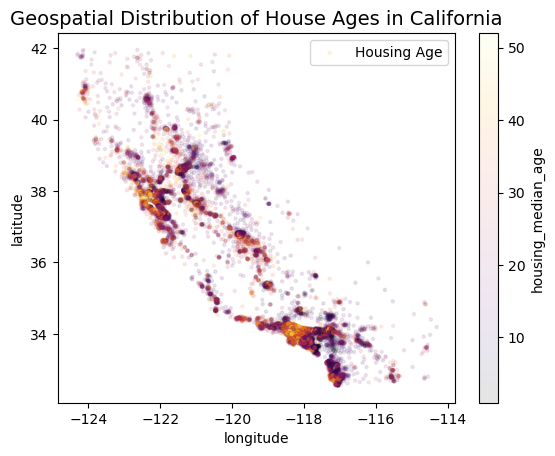

In [76]:
# Are older homes a staple of coastal neighborhoods?
housing_filtered.plot(kind="scatter", x="longitude", y="latitude", s=5, alpha=0.1, label="Housing Age",c="housing_median_age",cmap=plt.get_cmap("inferno"))
plt.title("Geospatial Distribution of House Ages in California", fontsize=14)
plt.show()


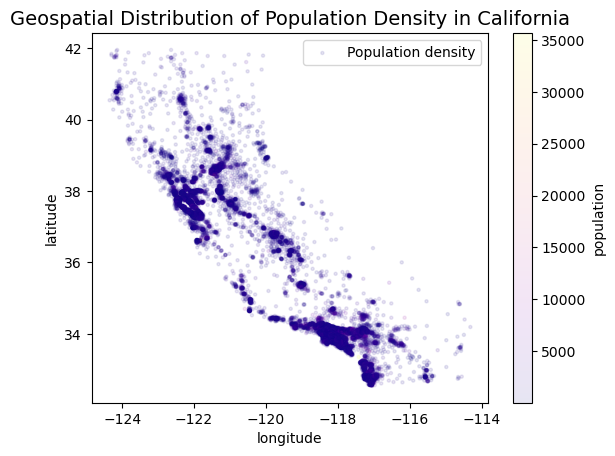

In [78]:
# Are older homes a staple of coastal neighborhoods?
housing_filtered.plot(kind="scatter", x="longitude", y="latitude", s=5, alpha=0.1, label="Population density",c="population",cmap=plt.get_cmap("plasma"))
plt.title("Geospatial Distribution of Population Density in California", fontsize=14)
plt.show()
